#### **Chapter_2**  
**ATMOS 5340: Environmental Programming and Statistics**  
**John Horel **


# Using Python modules

`numpy` provides routines to handle arrays and many calculations efficiently and is imported by convention as `np`. Numpy functions are very good at handling homogeneous data arrays (and similar in that respect to matlab functions).

`pandas` is really good at handling tabular/array data that may have heterogeneous types (floating and text, for example). It is imported by convention as `pd`. 

There are a couple sets of panda library routines  (`Series`, and `DataFrame`) used so frequently that we'll import those directly too.

`scipy` has a bunch of statistical functions and we'll import `stats` from `scipy`


`pyplot` is a _submodule_ of matplotlib. It is typically imported as the alias `plt` to handle basic plotting

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# make the printing look better numpy arrays
np.set_printoptions(precision=2,suppress=True)


# Chapter 2

# Level of the Great Salt Lake

Lake level has been measured in the vicinity of the Saltair marina since the 1800's. The data can be downloaded from the USGS from:
https://waterdata.usgs.gov/nwis/uv?site_no=10010000
Updating the file we use in the class is complicated by whether the data remains "provisional". 

Look in the `data` folder at the called `gsl_yr.csv`

Open the `gsl_yr.csv` file see the column contents and the units.

- The 0th column is the Year
- The 1st column is the Number of observations
- The 2nd column is the Lake level (in feet)

read 3 column vectors of years, number of observations, and yearly lake level for 1895-2020 period
lake level (in ft)

In [3]:
#read the lake level data
year = np.genfromtxt('../data/gsl_yr.csv', delimiter=',', usecols=0)
#convert lake level to meters
lev = .3048 * np.genfromtxt('../data/gsl_yr.csv', delimiter=',', usecols=2)

In [4]:
#print out the 1D arrays of data
print(year)


[1895. 1896. 1897. 1898. 1899. 1900. 1901. 1902. 1903. 1904. 1905. 1906.
 1907. 1908. 1909. 1910. 1911. 1912. 1913. 1914. 1915. 1916. 1917. 1918.
 1919. 1920. 1921. 1922. 1923. 1924. 1925. 1926. 1927. 1928. 1929. 1930.
 1931. 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942.
 1943. 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954.
 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966.
 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978.
 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990.
 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002.
 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014.
 2015. 2016. 2017. 2018. 2019. 2020. 2021.]


# Read Utah annual precip and temperature 

From http://www.wrcc.dri.edu/cgi-bin/divplot1_form.pl?4203
Statewide average ending each year in December
Temperature is average temperature (max+min/2)
convert inches to cm
convert F to C

In [5]:
yearp = np.genfromtxt('../data/utah_precip.csv', delimiter=',', usecols=0)
ppt = 2.54 * np.genfromtxt('../data/utah_precip.csv', delimiter=',', usecols=1)
yeart = np.genfromtxt('../data/utah_temp.csv', delimiter=',', usecols=0)
temp = np.genfromtxt('../data/utah_temp.csv', delimiter=',', usecols=1)
temp = 5. * (temp - 32.)/9.

In [6]:
#as a check, print out the 1D arrays
print(yearp)
print(ppt)
print(yeart)
print(temp)

[1895. 1896. 1897. 1898. 1899. 1900. 1901. 1902. 1903. 1904. 1905. 1906.
 1907. 1908. 1909. 1910. 1911. 1912. 1913. 1914. 1915. 1916. 1917. 1918.
 1919. 1920. 1921. 1922. 1923. 1924. 1925. 1926. 1927. 1928. 1929. 1930.
 1931. 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942.
 1943. 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954.
 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966.
 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978.
 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990.
 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002.
 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014.
 2015. 2016. 2017. 2018. 2019. 2020. 2021.]
[30.23 29.95 40.92 28.6  31.78 24.05 28.27 25.73 28.7  31.06 39.07 50.32
 40.01 39.8  46.96 30.   37.06 36.86 33.73 37.85 35.53 42.37 31.14 37.21
 28.65 39.5  38.1  38.07 37.13 26.37 35.69 31.6  43.87 29.31 32.46 36.68
 26.19 

# Figure 2.1

Create bar plot time series of lake level, Utah ppt, and Utah temp

[  0.01 -17.15]
 
0.01326 x - 17.15
<class 'numpy.poly1d'>
7.989477594597549 9.660688634623796
[1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908
 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922
 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936
 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950
 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964
 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022]


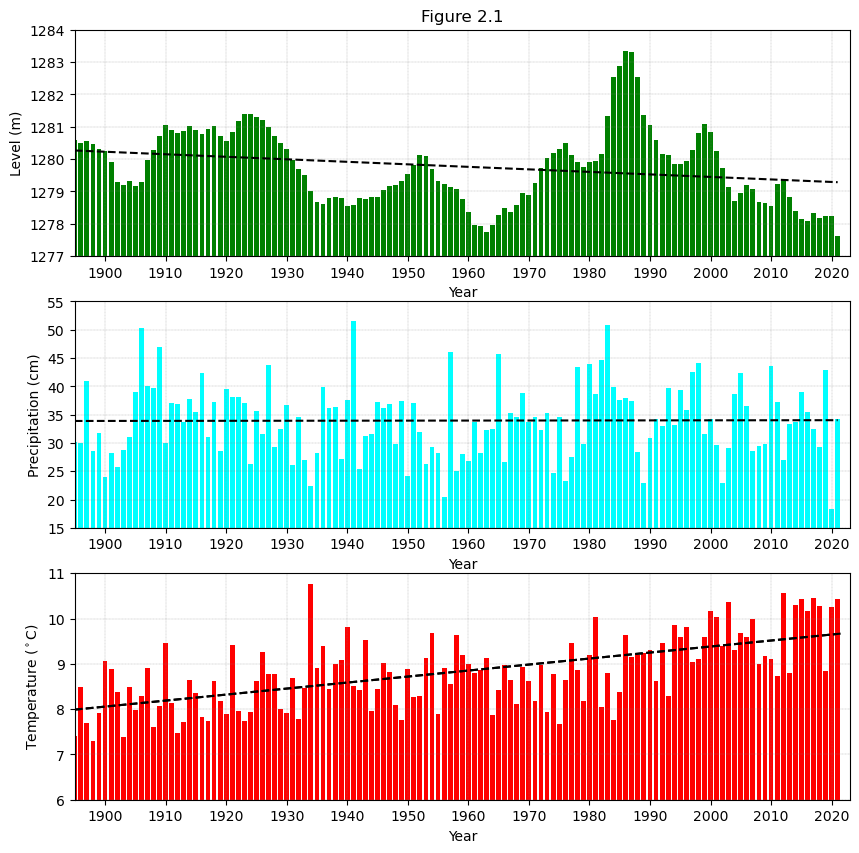

In [44]:
#create a list for the times for tic marks on the x axis. This will stop at 2020 (not 2030)
decade_ticks = np.arange(1900,2030,10)

#create a fig with 3 separate time series
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,10))
#plot lake level
ax1.bar(year,lev,color='green')
ax1.set(xlim=(1895,2023),ylim=(1277,1284))
ax1.set(xlabel="Year",ylabel='Level (m)')
ax1.set(xticks=decade_ticks)
ax1.set(title="Figure 2.1")
#plot Utah ppt
ax2.bar(year,ppt,color='cyan')
ax2.set(xlim=(1895,2023),ylim=(15,55))
ax2.set(xlabel="Year",ylabel='Precipitation (cm)')
ax2.set(xticks=decade_ticks)
#plot Utah temp
ax3.bar(year,temp,color='red')
ax3.set(xlim=(1895,2023),ylim=(6,11))
ax3.set(xlabel="Year",ylabel='Temperature ($^\circ$C)')
ax3.set(xticks=decade_ticks)

#add grids to each of the plots
ax1.grid(linestyle='--', color='grey', linewidth=.2)
ax2.grid(linestyle='--', color='grey', linewidth=.2)
ax3.grid(linestyle='--', color='grey', linewidth=.2)

#add a trend line (least squares fit) to temperature
#this type of "linear fitting" will be described later
#prefix lf highlights that this is a linear fit

#using the numpy function 'polyfit'
lf_t = np.polyfit(year, temp, 1)
print(lf_t)
#prefix est_lf highlights that these are temperature values estimated each year
#from the linear fit
est_lf_t = np.poly1d(lf_t)
print(est_lf_t)
print(type(est_lf_t))
#print values for first and last year
print(est_lf_t(1895),est_lf_t(2021))
ax3.plot(year,est_lf_t(year),"k--")
#extend this out for the check your understanding
future_years = np.arange(1895,2023,1)
print(future_years)
ax3.plot(future_years,est_lf_t(future_years),"k--")


# for the chapter 2 Check Your Understanding assignment, uncomment out the remainder of the code lines
# to add a least squares fit for lake level and precipitation
lf_l = np.polyfit(year, lev, 1)
est_lf_l = np.poly1d(lf_l)
ax1.plot(year,est_lf_l(year),"k--")
lf_p = np.polyfit(year,ppt, 1)
est_lf_p = np.poly1d(lf_p)
ax2.plot(year,est_lf_p(year),"k--")

plt.savefig('figure_2.1.png')

In [45]:

# illustrate the linear increase in temperature from 1895-2021 relative to the actual temperatures in those 2 years
#compute the difference between the last year (year -1) and first year (year 0)
t_diff = temp[-1]- temp[0]
print("observed temperature: 2021: %.1f C 1895: %.1f C Increase:  %.1f C" % (temp[-1],temp[0], t_diff))
#uncomment out the following for the Check Your Understanding assignment
#compute the difference between the linear estimates in year 2020 and 1895
t_lin = est_lf_t(2020) - est_lf_t(1895)
print("temperature linear trend: 2021: %.1f C 1895: %.1f C Increase:  %.1f C" % (est_lf_t(2021),est_lf_t(1895), t_lin))
#estimate the temperature in 2050
t_2050 = est_lf_t(2021)+t_lin*(2050-2021)/(2021-1895)
#estimate the temperature in 1800
t_1800 = est_lf_t(2021)+t_lin*(1800-2021)/(2021-1895)
print("estimated temperature: 2050: %.1f C 1800: %.1f C " % (t_2050,t_1800))      
#uncomment the following lines to obtain linear trends in level and precipitation
print(est_lf_l(year))
l_lin = est_lf_l(2021) - est_lf_l(1895)
print("lake level linear trend: 2020: %.1f m 1895: %.1f m Increase:  %.1f m" % (est_lf_l(2021),est_lf_l(1895), l_lin))
print(est_lf_p(year))
p_lin = est_lf_p(2021) - est_lf_p(1895)
print("precipitation linear trend: 2021: %.1f cm 1895: %.1f cm Increase:  %.1f cm" % (est_lf_p(2021),est_lf_p(1895), p_lin))


observed temperature: 2021: 10.4 C 1895: 7.4 C Increase:  3.0 C
temperature linear trend: 2021: 9.7 C 1895: 8.0 C Increase:  1.7 C
estimated temperature: 2050: 10.0 C 1800: 6.8 C 
[1280.27 1280.26 1280.25 1280.24 1280.24 1280.23 1280.22 1280.21 1280.21
 1280.2  1280.19 1280.18 1280.17 1280.17 1280.16 1280.15 1280.14 1280.14
 1280.13 1280.12 1280.11 1280.1  1280.1  1280.09 1280.08 1280.07 1280.07
 1280.06 1280.05 1280.04 1280.03 1280.03 1280.02 1280.01 1280.   1280.
 1279.99 1279.98 1279.97 1279.96 1279.96 1279.95 1279.94 1279.93 1279.93
 1279.92 1279.91 1279.9  1279.89 1279.89 1279.88 1279.87 1279.86 1279.86
 1279.85 1279.84 1279.83 1279.82 1279.82 1279.81 1279.8  1279.79 1279.78
 1279.78 1279.77 1279.76 1279.75 1279.75 1279.74 1279.73 1279.72 1279.71
 1279.71 1279.7  1279.69 1279.68 1279.68 1279.67 1279.66 1279.65 1279.64
 1279.64 1279.63 1279.62 1279.61 1279.61 1279.6  1279.59 1279.58 1279.57
 1279.57 1279.56 1279.55 1279.54 1279.54 1279.53 1279.52 1279.51 1279.5
 1279.5  1279.49 127

# Figure 2.2


In [9]:
#sort the values from smallest to largest using numpy
levsort = np.sort(lev)
print("sorted values",levsort)
#compute the range by determining the max and min values
range_lev = np.max(lev) - np.min(lev)
print("range %.1f m" % range_lev)

sorted values [1277.63 1277.75 1277.93 1277.97 1277.97 1278.09 1278.15 1278.18 1278.24
 1278.24 1278.27 1278.33 1278.36 1278.36 1278.39 1278.48 1278.54 1278.54
 1278.58 1278.58 1278.61 1278.64 1278.67 1278.67 1278.7  1278.76 1278.76
 1278.79 1278.79 1278.79 1278.82 1278.82 1278.82 1278.82 1278.88 1278.94
 1278.94 1279.   1279.03 1279.06 1279.06 1279.12 1279.12 1279.15 1279.18
 1279.22 1279.22 1279.22 1279.25 1279.25 1279.28 1279.31 1279.31 1279.34
 1279.34 1279.34 1279.4  1279.52 1279.55 1279.7  1279.7  1279.73 1279.73
 1279.76 1279.82 1279.86 1279.86 1279.92 1279.92 1279.92 1279.95 1279.95
 1279.98 1279.98 1280.04 1280.1  1280.13 1280.13 1280.13 1280.16 1280.16
 1280.19 1280.25 1280.25 1280.28 1280.28 1280.31 1280.31 1280.31 1280.46
 1280.5  1280.5  1280.5  1280.56 1280.56 1280.59 1280.59 1280.71 1280.71
 1280.71 1280.77 1280.8  1280.8  1280.83 1280.83 1280.86 1280.89 1280.89
 1280.92 1280.98 1281.01 1281.01 1281.04 1281.04 1281.07 1281.17 1281.2
 1281.29 1281.32 1281.38 1281.41 1281.

Number of values 127
sum of weights 1.00


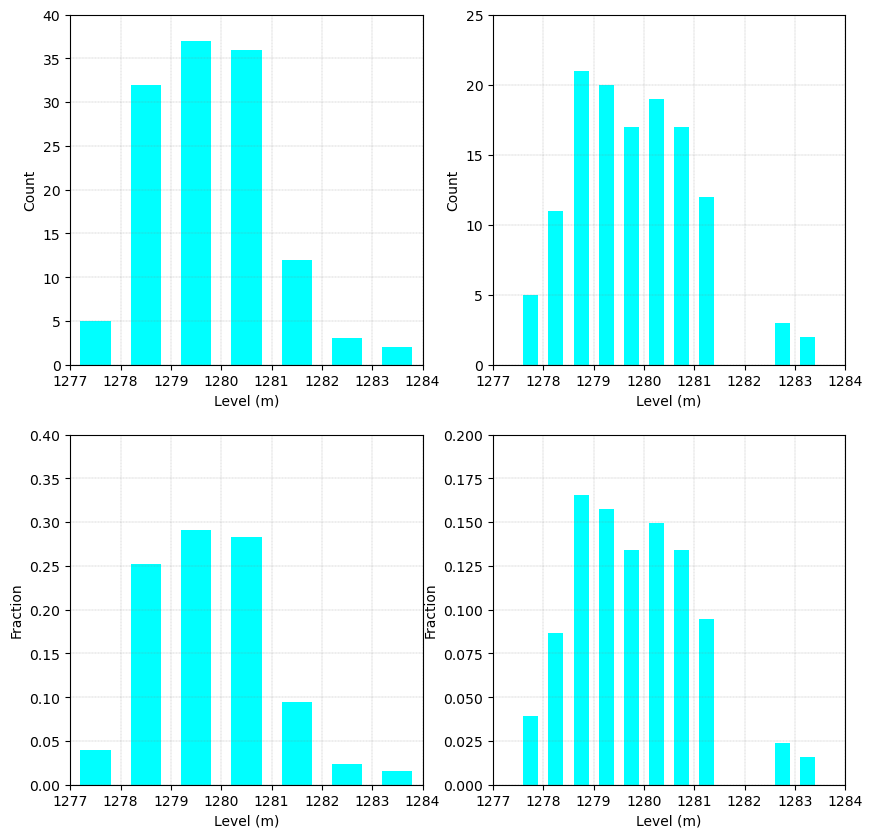

In [10]:
#this will seem odd but the matplotlib hist function doesn't work easily for noninteger intervals, 
#so using numpy version and then plotting
fig2,ax = plt.subplots(2,2,figsize=(10,10))
#create a 1D array from 1277 to 1284 at an interval of 1
x1 = np.arange(1277,1285,1)
#use the numpy histogram function
#returns the values and the edges of the bins
hist_val1,bins1 = np.histogram(lev,x1)
#define a width for the bin
width1 = 0.6 * (bins1[1] - bins1[0])
#get a 1D array of the centers of each bin
center1 = (bins1[:-1] + bins1[1:]) / 2
#plot in the upper left subplot
ax1 = ax[0,0]
ax1.bar(center1,hist_val1,align='center',width=width1,color='cyan')
ax1.set(xlim=(1277,1284),ylim=(0,40))
ax1.set(xlabel="Level (m)",ylabel='Count')

#repeat now using .5 m bins
x2 = np.arange(1277.,1284.5,0.5)
hist_val2,bins2 = np.histogram(lev,x2)
width2 = 0.6 * (bins2[1] - bins2[0])
center2 = (bins2[:-1] + bins2[1:]) / 2
#plot in upper right
ax2 = ax[0,1]
ax2.bar(center2,hist_val2,align='center',width=width2,color='cyan')
ax2.set(xlim=(1277,1284),ylim=(0,25))
ax2.set(xlabel="Level (m)",ylabel='Count')

#display probabilities
#get total number of values
N = len(lev)
print("Number of values %d" % N)

#need to weight each of the values so each one is a fraction of the total (1)
weights = np.ones_like(lev)/float(N)
sum_weights = np.sum(weights)
print("sum of weights %.2f" % sum_weights)

#plot histogram in 1 m bins in terms of the fraction of values in that bin range
hist_val3,bins3 = np.histogram(lev,x1,weights=weights)
ax3 = ax[1,0]
ax3.bar(center1,hist_val3,align='center',width=width1,color='cyan')
ax3.set(xlim=(1277,1284),ylim=(0,0.4))
ax3.set(xlabel="Level (m)",ylabel='Fraction')

#plot histogram in 0.5 m bins in terms of the fraction of values in that bin range 
hist_val4,bins4 = np.histogram(lev,x2,weights=weights)
ax4 = ax[1,1]
ax4.bar(center2,hist_val4,align='center',width=width2,color='cyan')
ax4.set(xlim=(1277,1284),ylim=(0,0.2))
ax4.set(xlabel="Level (m)",ylabel='Fraction')

#add grids to each of the plots
ax1.grid(linestyle='--', color='grey', linewidth=.2)
ax2.grid(linestyle='--', color='grey', linewidth=.2)
ax3.grid(linestyle='--', color='grey', linewidth=.2)
ax4.grid(linestyle='--', color='grey', linewidth=.2)
plt.savefig('figure_2.2.png')


# Figure 2.3

Cumulative empirical probability distribution

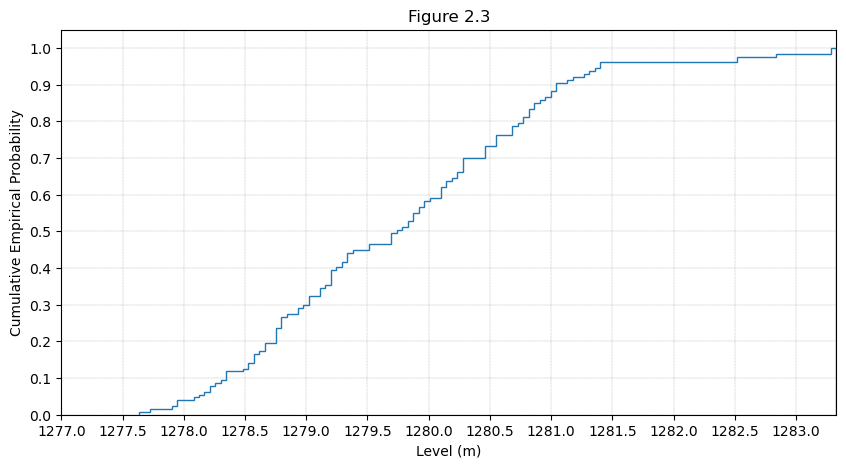

In [11]:
# plot the cumulative histogram
fig3,ax = plt.subplots(1,1,figsize=(10,5))
n_bins = N
n, bins, patches = ax.hist(lev, n_bins, density='True', histtype='step',
                           cumulative=True, label='Empirical')
ax.set(xlabel="Level (m)",ylabel='Cumulative Empirical Probability')
ax.set(xlim=(min(lev),max(lev)))
ax.set_xticks(np.arange(1277,max(lev),step=0.5))
ax.set_yticks(np.arange(0, 1.1, step=0.10))
ax.grid(linestyle='--', color='grey', linewidth=.2)
ax.set(title="Figure 2.3")
plt.savefig('figure_2.3.png')


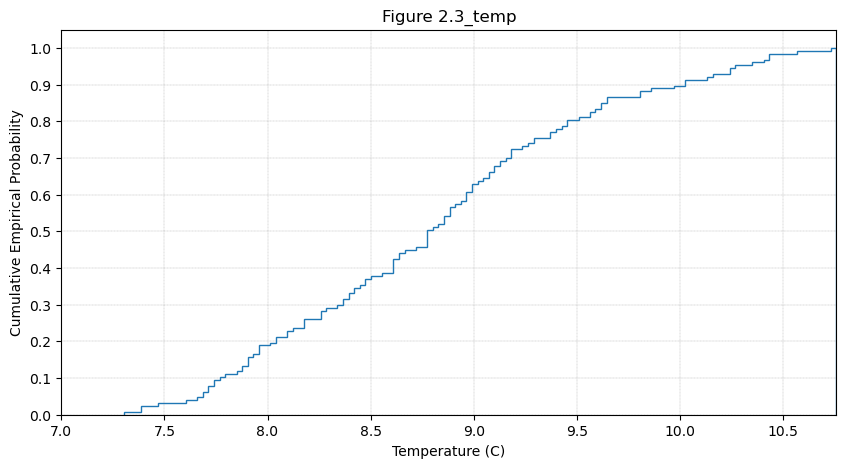

In [12]:
# plot the cumulative histogram for temperature
fig3,ax = plt.subplots(1,1,figsize=(10,5))
n_bins = N
n, bins, patches = ax.hist(temp, n_bins, density='True', histtype='step',
                           cumulative=True, label='Empirical')
ax.set(xlabel="Temperature (C)",ylabel='Cumulative Empirical Probability')
ax.set(xlim=(min(temp),max(temp)))
ax.set_xticks(np.arange(7,max(temp),step=0.5))
ax.set_yticks(np.arange(0, 1.1, step=0.10))
ax.grid(linestyle='--', color='grey', linewidth=.2)
ax.set(title="Figure 2.3_temp")
plt.savefig('figure_2.3_temp.png')


# Figure 2.4 Boxplot

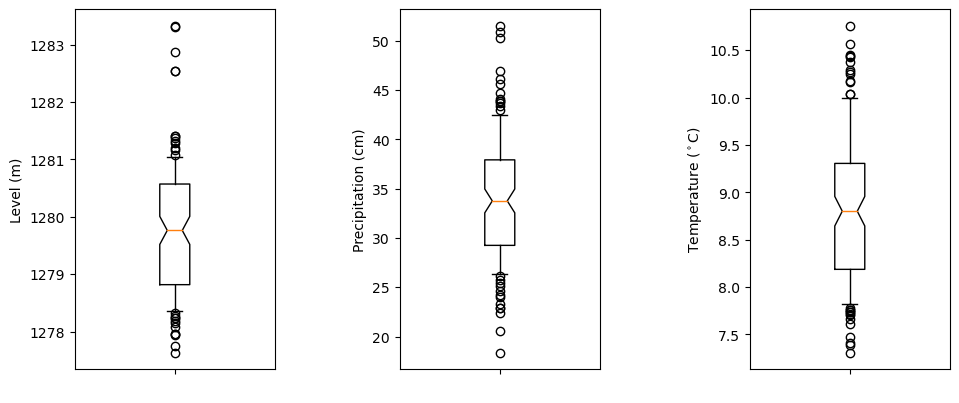

In [13]:

#fig4,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,4))
fig = plt.figure(1,figsize=(10,4))
#create three plots areas
ax1 = fig.add_axes([.075, .05, .20, .9])
ax2 = fig.add_axes([.40, .05, .20, .9])
ax3 = fig.add_axes([.75, .05, .20, .9])

#whiskers are flxible in Python (here whiskers are at the 10th, and 90th percentile)

ax1.boxplot(lev,notch=True,whis=(10,90))
ax1.set(xticklabels=" ",ylabel='Level (m)')

ax2.boxplot(ppt,notch=True,whis=(10,90))
ax2.set(xticklabels=' ',ylabel="Precipitation (cm)")

ax3.boxplot(temp,notch=True,whis=(10,90))
ax3.set(xticklabels=' ', ylabel="Temperature ($^\circ$C)")

plt.savefig('figure_2.4.png')



# Measures of central tendency

We will use a mix of scipy stats and pandas routines to illustrate the basic statistical commands.


In [14]:
# create one 3 column numpy array for all 3 variables of length N years
array = np.ones((N,3),dtype=np.float_)
array[:,0] = lev
array[:,1] = ppt
array[:,2] = temp


In [15]:
print(array)

[[1280.59   30.23    7.41]
 [1280.5    29.95    8.5 ]
 [1280.56   40.92    7.7 ]
 [1280.46   28.6     7.31]
 [1280.31   31.78    7.91]
 [1280.25   24.05    9.06]
 [1279.92   28.27    8.89]
 [1279.31   25.73    8.38]
 [1279.22   28.7     7.39]
 [1279.34   31.06    8.48]
 [1279.18   39.07    7.98]
 [1279.31   50.32    8.28]
 [1279.98   40.01    8.9 ]
 [1280.28   39.8     7.62]
 [1280.71   46.96    8.07]
 [1281.04   30.      9.46]
 [1280.89   37.06    8.13]
 [1280.8    36.86    7.48]
 [1280.86   33.73    7.71]
 [1281.01   37.85    8.65]
 [1280.89   35.53    8.37]
 [1280.77   42.37    7.82]
 [1280.92   31.14    7.74]
 [1281.01   37.21    8.62]
 [1280.71   28.65    8.19]
 [1280.56   39.5     7.89]
 [1280.83   38.1     9.42]
 [1281.17   38.07    7.96]
 [1281.41   37.13    7.74]
 [1281.41   26.37    7.93]
 [1281.29   35.69    8.62]
 [1281.2    31.6     9.26]
 [1280.98   43.87    8.78]
 [1280.71   29.31    8.78]
 [1280.5    32.46    8.01]
 [1280.31   36.68    7.92]
 [1279.98   26.19    8.69]
 

# Using pandas DataFrame
Documentation on pandas:
http://pandas.pydata.org/pandas-docs/stable/

How to load indices and data into a DataFrame

In [16]:
#by default the pandas display format shows 5 places to the right of the decimal point, limit it to 1
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df = pd.DataFrame(array, index=year.astype(int),columns=['Great Salt Lake Level','Utah Precipitation','Utah Temperature'])

In [17]:
#Pthyon notebooks display frames as html tables
df

Great Salt Lake Level  Utah Precipitation  Utah Temperature
1895                 1280.6                30.2               7.4
1896                 1280.5                29.9               8.5
1897                 1280.6                40.9               7.7
1898                 1280.5                28.6               7.3
1899                 1280.3                31.8               7.9
...                     ...                 ...               ...
2017                 1278.3                32.5              10.4
2018                 1278.2                29.4              10.3
2019                 1278.2                43.0               8.9
2020                 1278.2                18.3              10.2
2021                 1277.6                34.3              10.4

[127 rows x 3 columns]

In [18]:
#some basic info + output precentiles
basic_vals = df.describe(percentiles=[.05,.10,.25,.33,.50,.66,.75,.90,.95])
print(basic_vals)

       Great Salt Lake Level  Utah Precipitation  Utah Temperature
count                  127.0               127.0             127.0
mean                  1279.8                34.0               8.8
std                      1.2                 6.5               0.8
min                   1277.6                18.3               7.3
5%                    1278.2                24.1               7.7
10%                   1278.4                26.3               7.8
25%                   1278.8                29.2               8.2
33%                   1279.1                30.1               8.4
50%                   1279.8                33.8               8.8
66%                   1280.3                36.9               9.1
75%                   1280.6                37.9               9.3
90%                   1281.1                42.7              10.0
95%                   1281.4                44.5              10.3
max                   1283.3                51.5              

# Basic pandas descriptive statistics
https://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics

#useful panda info
https://jeffdelaney.me/blog/useful-snippets-in-pandas/


In [19]:
#so we can see small differences, now display panda objects to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#sample std and estimate of the population std
#dividing through by N - ddof
pd.set_option('display.float_format', lambda x: '%.2f' % x)
std_sample= df.std(ddof=0)
std_pop_est = df.std(ddof=1)
print ('std_sample=',std_sample,'\n std_pop_est=',std_pop_est)

std_sample= Great Salt Lake Level   1.16
Utah Precipitation      6.48
Utah Temperature        0.79
dtype: float64 
 std_pop_est= Great Salt Lake Level   1.16
Utah Precipitation      6.51
Utah Temperature        0.80
dtype: float64


In [20]:
#In what year did the min values happen and what were the min values?
print(df.idxmin())
print(df.min())


Great Salt Lake Level    2021
Utah Precipitation       2020
Utah Temperature         1898
dtype: int64
Great Salt Lake Level   1277.63
Utah Precipitation        18.34
Utah Temperature           7.31
dtype: float64


In [21]:
#In what year did the max values happen and what were the max values?
print(df.idxmax())
print(df.max())

Great Salt Lake Level    1986
Utah Precipitation       1941
Utah Temperature         1934
dtype: int64
Great Salt Lake Level   1283.33
Utah Precipitation        51.54
Utah Temperature          10.76
dtype: float64


In [22]:
#now shifting to using scipy, not pandas
#find the modes for all 3 variables (level, temp, precip)
#mode- the most common values, but not really that useful to find the mode of the raw data
#axis=0 means do separately for each column (finding mode across the 0th axis, the rows)
modes = stats.mode(array,axis=0)
print(modes)
#round the data to one decimal place
array_tenths = np.around(array,decimals=1)
modes_tenths = stats.mode(array_tenths,axis=0)
print(modes_tenths)
#round the data to integers
array_int = np.around(array,decimals=0)
modes_int = stats.mode(array_int,axis=0)
print(modes_int)
#note how many more values corresponding to the modes if rounded

ModeResult(mode=array([[1278.82,   32.31,    7.96]]), count=array([[4, 2, 2]]))
ModeResult(mode=array([[1278.8,   32.5,    8.9]]), count=array([[9, 3, 9]]))
ModeResult(mode=array([[1279.,   37.,    9.]]), count=array([[41, 12, 55]]))


/scratch/local/u0035056/6275390/ipykernel_703317/1731959497.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  modes = stats.mode(array,axis=0)
/scratch/local/u0035056/6275390/ipykernel_703317/1731959497.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  modes_t

In [23]:
#compute mean of the values in the three samples
xbar = np.mean(array,axis=0)
print(xbar)
#compute mean of the values between the 10th and 90th percentile in the three samples
xbar_trim = stats.trim_mean(array,0.1)
#compute median of the values in the three samples
xmed = np.median(array,axis=0);
#loop over the 3 columns 0, 1, 2
for v in range(0,3):
    print("Mean: %.1f Trimmed mean: %.1f Median: %.1f" % (xbar[v],xbar_trim[v],xmed[v]))

[1279.78   33.97    8.83]
Mean: 1279.8 Trimmed mean: 1279.7 Median: 1279.8
Mean: 34.0 Trimmed mean: 33.8 Median: 33.8
Mean: 8.8 Trimmed mean: 8.8 Median: 8.8


In [24]:
#compute interquartile ranges for the 3 samples (difference between the 75th and 25th percentiles)
iqr_var=stats.iqr(array,axis=0)
for v in range(0,3):
    print("IQR: %.1f" % iqr_var[v])

IQR: 1.8
IQR: 8.7
IQR: 1.1


In [25]:
#median absolute deviation
#go back to pandas for this one
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df.mad()

/scratch/local/u0035056/6275390/ipykernel_703317/1768450554.py:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df.mad()


Great Salt Lake Level   0.9
Utah Precipitation      5.3
Utah Temperature        0.6
dtype: float64

# Illustrating robust and resistant central tendency metrics
%put in a bad value

In [26]:
#start by putting all the original data into array "array_wbad"
array_wbad = np.ones((N,3),dtype=np.float_)
array_wbad[:,0] = lev
array_wbad[:,1] = ppt
array_wbad[:,2] = temp

#now make the second value for each of the 3 variables awful: -9999
array_wbad[1,:] = -9999
xbar_wbad = np.mean(array_wbad,axis=0);
xmed_wbad = np.median(array_wbad,axis=0);
xbar_trim_wbad = stats.trim_mean(array_wbad,0.1);
for v in range(0,3):
    print("Mean: %.1f Trimmed mean: %.1f Median: %.1f" % (xbar_wbad[v],xbar_trim_wbad[v],xmed_wbad[v]))

Mean: 1191.0 Trimmed mean: 1279.7 Median: 1279.7
Mean: -45.0 Trimmed mean: 33.7 Median: 33.8
Mean: -70.0 Trimmed mean: 8.8 Median: 8.8


In [27]:
# unbiased estimate of pop standard deviation and variance
#again the denominator used is N-ddof
std0 = np.std(array,ddof=1,axis=0)
var0 = np.var(array,ddof=1,axis=0)
# sample standard deviation and variance
std1 = np.std(array,axis=0)
var1 = np.var(array,axis=0)
for v in range(0,3):
    print("Pop Est std: %.2f Pop Est var: %.2f" % (std0[v],var0[v]))
    print("Sample std: %.2f Sample var: %.2f" % (std1[v],var1[v]))

Pop Est std: 1.16 Pop Est var: 1.35
Sample std: 1.16 Sample var: 1.34
Pop Est std: 6.51 Pop Est var: 42.37
Sample std: 6.48 Sample var: 42.04
Pop Est std: 0.80 Pop Est var: 0.63
Sample std: 0.79 Sample var: 0.63


In [28]:
#skewness
skew = stats.skew(array,axis=0)
for v in range(0,3):
    print("Skewness: %.2f" % (skew[v]))

Skewness: 0.58
Skewness: 0.27
Skewness: 0.31


# Anomalies


In [29]:
#repeat computing sample means for each variable
xbar= np.mean(array,axis=0)
print(np.shape(array))
print(np.shape(xbar))
# the mean values for each of the 3 columns are then subtracted from each row of the array to obtain anomalies
array_a = array - xbar;

(127, 3)
(3,)


In [30]:
#put the anomalies into a pandas data frame for convenience
pd.set_option('display.float_format', lambda x: '%.1f' % x)
dfa = pd.DataFrame(array_a, index=year.astype(int),columns=['Great Salt Lake Level','Utah Precipitation','Utah Temperature'])
dfa
print("Min values", dfa.min(), "Max values",dfa.max())

Min values Great Salt Lake Level    -2.1
Utah Precipitation      -15.6
Utah Temperature         -1.5
dtype: float64 Max values Great Salt Lake Level    3.6
Utah Precipitation      17.6
Utah Temperature         1.9
dtype: float64


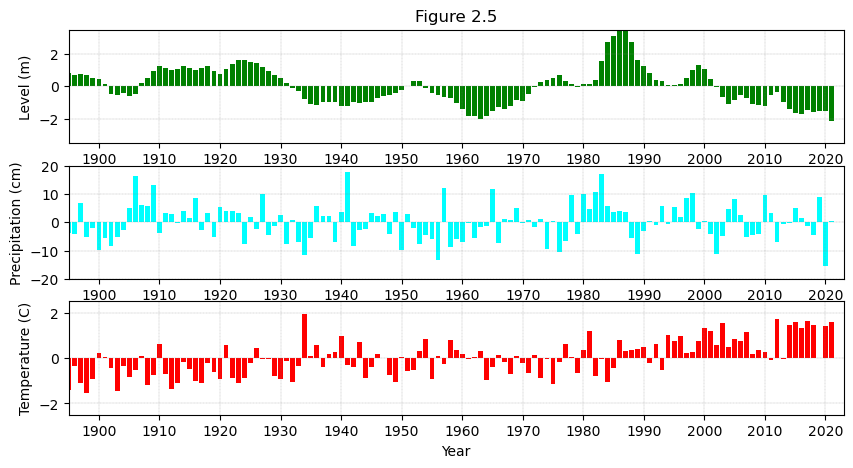

In [31]:
#plot the anomalies
decade_ticks = np.arange(1900,2030,10)
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,5))
ax1.bar(year,array_a[:,0],color='green')
ax1.set(xlim=(1895,2023),ylim=(-3.5,3.5))
ax1.set(xlabel="Year",ylabel='Level (m)')
ax1.set(xticks=decade_ticks)
ax1.set(title="Figure 2.5")
ax2.bar(year,array_a[:,1],color='cyan')
ax2.set(xlim=(1895,2023),ylim=(-20,20))
ax2.set(xlabel="Year",ylabel='Precipitation (cm)')
ax2.set(xticks=decade_ticks)
ax3.bar(year,array_a[:,2],color='red')
ax3.set(xlim=(1895,2023),ylim=(-2.5,2.5))
ax3.set(xlabel="Year",ylabel='Temperature (C)')
ax3.set(xticks=decade_ticks)

ax1.grid(linestyle='--', color='grey', linewidth=.2)
ax2.grid(linestyle='--', color='grey', linewidth=.2)
ax3.grid(linestyle='--', color='grey', linewidth=.2)

plt.savefig('figure_2.5.png')

# 1991-2020 climate normal

In [32]:
# define climate normal for 1991-2020 period. find the range of values during those years
#pandas handles these by index values
clim_period=df.loc['1981':'2021']
print(clim_period)
#compute the 30 year mean, aka the new climate normal
cnorm = np.mean(clim_period)
print(cnorm)
#compute the anomalies relative to the climate normals
df_cna = df - cnorm;
print(df_cna)
#put the anomalies into a pandas data frame for convenience
#print the min and max values
print("Min values", df_cna.min(), "Max values",df_cna.max())

      Great Salt Lake Level  Utah Precipitation  Utah Temperature
1981                 1279.9                38.6              10.0
1982                 1280.2                44.7               8.0
1983                 1281.3                50.9               8.8
1984                 1282.5                39.9               7.8
1985                 1282.9                37.5               8.4
1986                 1283.3                38.0               9.6
1987                 1283.3                37.4               9.1
1988                 1282.5                28.4               9.2
1989                 1281.4                22.9               9.2
1990                 1281.0                30.8               9.3
1991                 1280.6                34.3               8.6
1992                 1280.2                33.0               9.5
1993                 1280.1                39.6               8.3
1994                 1279.9                33.2               9.9
1995      

/uufs/chpc.utah.edu/common/home/u0035056/software/pkg/miniconda3/envs/atmos5340/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


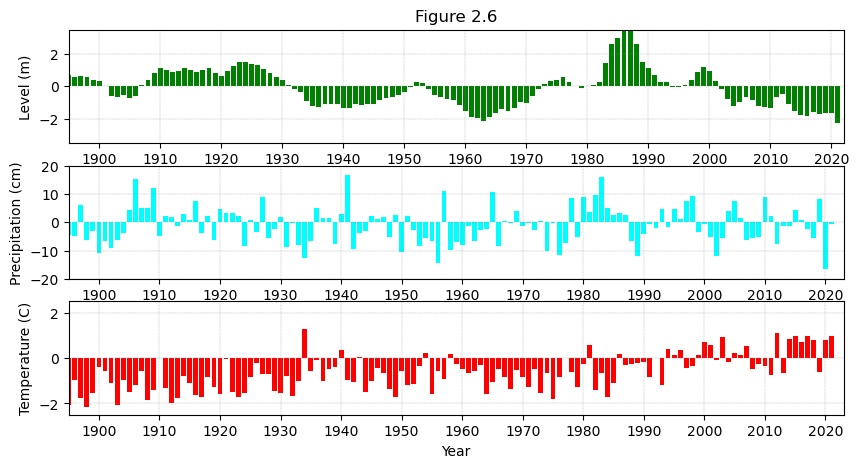

In [33]:
#plot anomalies relative to 1981-2020 climate normal
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,5))
ax1.bar(year,df_cna['Great Salt Lake Level'],color='green')
ax1.set(xlim=(1895,2022),ylim=(-3.5,3.5))
ax1.set(xlabel="Year",ylabel='Level (m)')
ax1.set(xticks=decade_ticks)
ax1.set(title="Figure 2.6")
ax2.bar(year,df_cna['Utah Precipitation'],color='cyan')
ax2.set(xlim=(1895,2023),ylim=(-20,20))
ax2.set(xlabel="Year",ylabel='Precipitation (cm)')
ax2.set(xticks=decade_ticks)
ax3.bar(year,df_cna['Utah Temperature'],color='red')
ax3.set(xlim=(1895,2023),ylim=(-2.5,2.5))
ax3.set(xlabel="Year",ylabel='Temperature (C)')
ax3.set(xticks=decade_ticks)

ax1.grid(linestyle='--', color='grey', linewidth=.2)
ax2.grid(linestyle='--', color='grey', linewidth=.2)
ax3.grid(linestyle='--', color='grey', linewidth=.2)

plt.savefig('figure_2.6.png')

## Handling Monthly Great Salt Lake Level

1) salt lake level begins in 1903 through 2020
2) create 2d array levm for processing
3) rows are years and columns are months
4) dates will be the midpoint of the month


In [34]:
#read the Monthly lake level data
yearm = np.genfromtxt('../data/gsl_monthly.csv', delimiter=',', usecols=0)
nym = int(max(yearm) - min(yearm))+1
print(np.size(yearm))
monm = np.genfromtxt('../data/gsl_monthly.csv', delimiter=',', usecols=1)
#convert lake level to meters
levmon = .3048 * np.genfromtxt('../data/gsl_monthly.csv', delimiter=',', usecols=2)
#get midpoint of each month as the date
datemon =  yearm+(monm-0.5)/12.;

1428


In [35]:
#convert from vector to 2D array with rows years and columns months
levm = levmon.reshape((nym,12))
datem = datemon.reshape((nym,12))
print(levm)
print(datem)
print(np.shape(levm))

[[1279.15 1279.22 1279.25 ... 1279.   1278.97 1278.97]
 [1279.06 1279.06 1279.18 ... 1279.31 1279.22 1279.22]
 [1279.22 1279.25 1279.31 ... 1278.94 1278.88 1278.91]
 ...
 [1277.87 1278.03 1278.18 ... 1278.09 1278.12 1278.24]
 [1278.3  1278.45 1278.51 ... 1277.84 1277.78 1277.78]
 [1277.81 1277.9  1277.97 ... 1277.2  1277.29 1277.29]]
[[1903.04 1903.12 1903.21 ... 1903.79 1903.88 1903.96]
 [1904.04 1904.12 1904.21 ... 1904.79 1904.88 1904.96]
 [1905.04 1905.12 1905.21 ... 1905.79 1905.88 1905.96]
 ...
 [2019.04 2019.12 2019.21 ... 2019.79 2019.88 2019.96]
 [2020.04 2020.12 2020.21 ... 2020.79 2020.88 2020.96]
 [2021.04 2021.12 2021.21 ... 2021.79 2021.88 2021.96]]
(119, 12)


[1279.64 1279.72 1279.82 1279.91 1279.97 1279.99 1279.91 1279.76 1279.62
 1279.54 1279.53 1279.57]
[1.19 1.19 1.18 1.18 1.18 1.19 1.2  1.21 1.21 1.21 1.22 1.21]


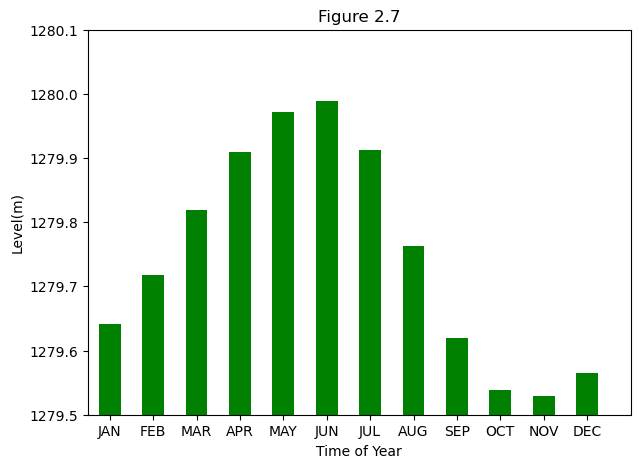

In [36]:
#compute monthly mean and sample standard deviation for each month over all years

mean_m = np.mean(levm,axis=0);
sx_m = np.std(levm,axis=0,ddof=0);
print(mean_m)
print(sx_m)

#plot monthly mean;
xb = np.arange(0.5,12.5,1)
fig8,ax8 = plt.subplots(1,1,figsize=(7,5))
ax8.bar(xb,mean_m,color='g',align='center',width=0.5)
ax8.set(xlabel="Time of Year",ylabel='Level(m)')
ax8.set(xlim=(0,12.5),ylim=(1279.5,1280.1)) 
ax8.set(xticks=xb,xticklabels=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
ax8.ticklabel_format(axis='y',style='plain',useOffset=False)
ax8.set(title="Figure 2.7")
plt.savefig('figure_2.7.png')


In [37]:
#compute anomalies from monthly calendar means
levm_a = levm - mean_m;
#now instead of treating each calendar month separately, combine all together by reshaping from (years,mon) to first month to last month
nom = np.size(levm_a)
#reshape to 1D array
levma = levm_a.reshape(nom)
#compute standardized anomalies separately for each calendar mnth
z = levm_a/sx_m;
#reshape to 1D arrau
za = z.reshape(nom)
#print(levma)
#print(za)
#print(np.shape(za))

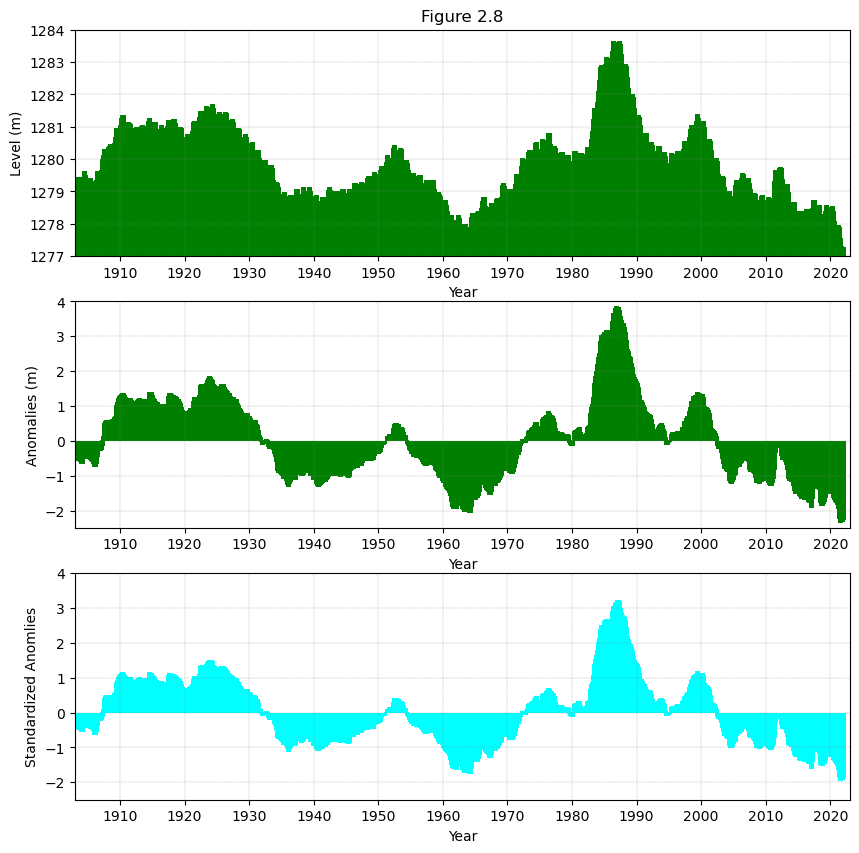

In [38]:
fig8,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,10))
decade_ticks = np.arange(1910,2030,10)
ax1.bar(datemon,levmon,color='green')
ax1.set(xlim=(1903,2023),ylim=(1277,1284))
ax1.set(xlabel="Year",ylabel='Level (m)')
ax1.set(xticks=decade_ticks)
ax1.set(title="Figure 2.8")
ax2.bar(datemon,levma,color='green')
ax2.set(xlim=(1903,2023),ylim=(-2.5,4))
ax2.set(xlabel="Year",ylabel='Anomalies (m)')
ax2.set(xticks=decade_ticks)
ax3.bar(datemon,za,color='cyan')
ax3.set(xlim=(1903,2023),ylim=(-2.5,4))
ax3.set(xlabel="Year",ylabel='Standardized Anomlies')
ax3.set(xticks=decade_ticks)

ax1.grid(linestyle='--', color='grey', linewidth=.2)
ax2.grid(linestyle='--', color='grey', linewidth=.2)
ax3.grid(linestyle='--', color='grey', linewidth=.2)

plt.savefig('figure_2.8.png')



1428
[-0.41 -0.42 -0.49 ... -1.93 -1.84 -1.87]


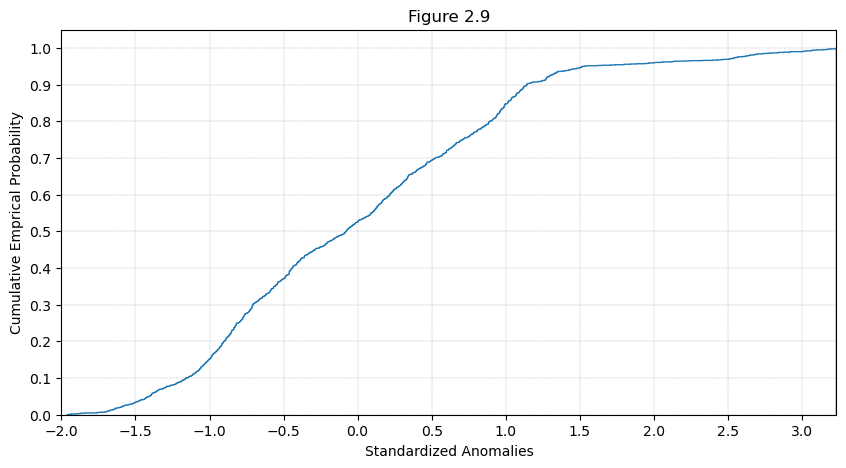

In [39]:
# CDF of monthly lake level
fig9,ax = plt.subplots(1,1,figsize=(10,5))
print(nom)
print(za)
n, bins, patches = ax.hist(za, nom, density='True', histtype='step',
                           cumulative=True, label='Empirical')
ax.set(xlabel="Standardized Anomalies",ylabel='Cumulative Emprical Probability')
ax.set(xlim=(-2,max(za)))
ax.set_xticks(np.arange(-2,max(za),step=0.5))
ax.set_yticks(np.arange(0, 1.1, step=0.10))
ax.grid(linestyle='--', color='grey', linewidth=.2)
ax.set_title("Figure 2.9")
plt.savefig('figure_2.9.png')

# Mean and median smoother
One way is to use pandas built in functions to handle usch as the rolling function
These are the sorts of things pandas is great at

In [40]:
#first get anomalies for Utah Precipitation for convenience as a dataframe
ppt_vals= df['Utah Precipitation']
ppt_climo = np.mean(ppt_vals)
#create anomaly dataframe
ppt_a = ppt_vals - ppt_climo
#print(ppt_a)

#going to do 9 smoothing situations by varying the window length and number of iterations
#window is how many values in a mean/median sample 
#itera is the number of iterations to compute  
#in cases, the first row contains window and second row contains itera
cases = [[3, 7, 11],[1, 3, 5]]
print(np.shape(cases))
#print(type(cases))
#create array for the smoothed values
ppts_mean = np.zeros((N,3,3))
ppts_median = np.zeros((N,3,3))
for wind in range(0,3):
    #select from cases. cases is a list so index using separate brackets for the rows and columns
    window = cases[0][wind]
    for it in range(0,3):
        itera = cases[1][it]
        #do the first time        
        vals_mean=ppt_a.rolling(window,center=True).mean()
        vals_median=ppt_a.rolling(window,center=True).median()
        #loop over the iterations
        for ival in range(0,itera+1):
            #reset the first and last values to the original data, otherwise they are Nan's
            for iwin in range (0,window-1):
                vals_mean.values[iwin]=ppt_a.iloc[iwin]
                vals_median.values[iwin]=ppt_a.iloc[iwin]
            for iwin in range(-(window-1),0):
                vals_mean.values[iwin]=ppt_a.iloc[iwin]
                vals_median.values[iwin]=ppt_a.iloc[iwin]
            #repeat calculation for this iteration
            vals_mean_n=vals_mean.rolling(window,center=True).mean()
            vals_median_n=vals_median.rolling(window,center=True).median()
            diff = vals_median.values - vals_median_n.values
            # replace previous iteration with current one
            vals_mean = vals_mean_n
            vals_median = vals_median_n
        # save the smoothed values
        ppts_mean[:,it,wind] = vals_mean.values
        ppts_median[:,it,wind] = vals_median.values
        #print(ppts_mean[:,it,wind])
        #delete reference to the data frames
        del vals_mean, vals_median,vals_mean_n,vals_median_n

(2, 3)


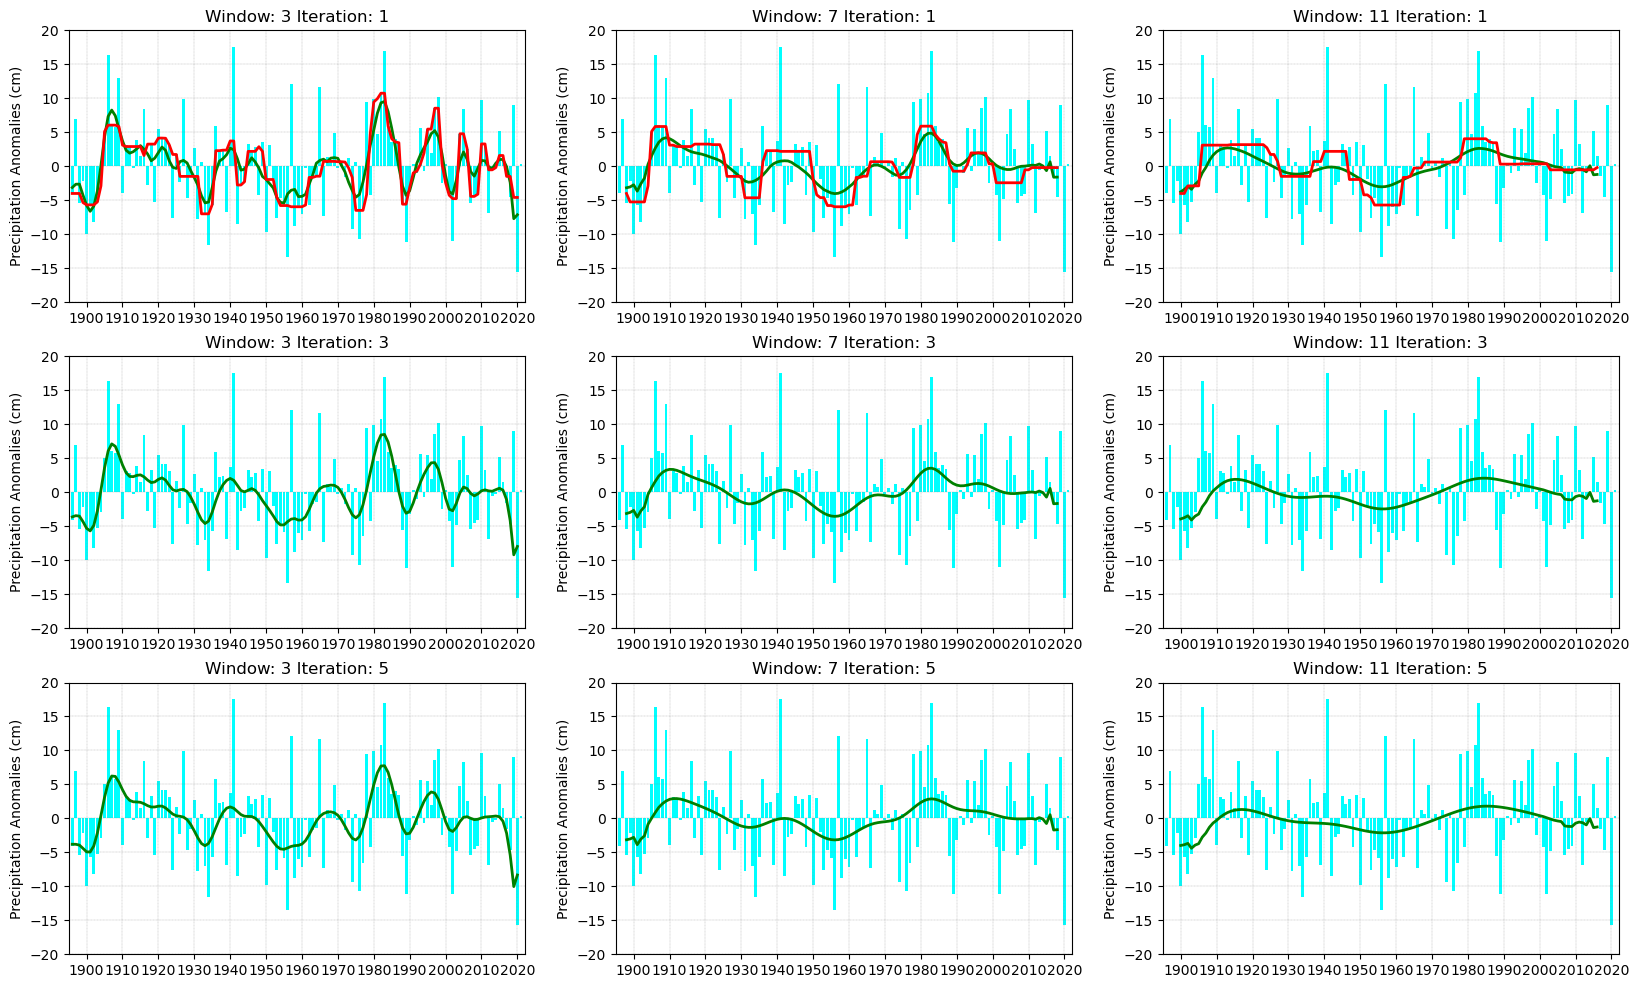

In [41]:
# plot Utah precipitation with mean and medians superimposed
decade_ticks = np.arange(1900,2030,10)
fig11,ax = plt.subplots(3,3,figsize=(20,12))
#loop over 9 cases
for wind in range(0,3):
    window = cases[0][wind]
    for it in range(0,3):
        itera = cases[1][it]
        #plot original time series in each frame
        ax[it,wind].bar(year,array_a[:,1],color='cyan')
        ax[it,wind].plot(year,ppts_mean[:,it,wind],color='green',linewidth=2);
        #only show median for single iteration as no difference if more
        if(it<1):
            ax[it,wind].plot(year,ppts_median[:,it,wind],color='red',linewidth=2);
        ax[it,wind].set(xlim=(1895,2022),ylim=(-20,20))
#        ax[it,wind].set(xlabel="Year",ylabel='Precipitation Anomalies (cm)')
        ax[it,wind].set(ylabel='Precipitation Anomalies (cm)')
        ax[it,wind].set(xticks=decade_ticks)
        ax[it,wind].grid(linestyle='--', color='grey', linewidth=.2)
        ax[it,wind].set_title('Window: %s Iteration: %s' % (window,itera))
plt.savefig('figure_2.11.png')